[[5.43235323]
 [4.1908945 ]
 [5.67952163]
 [5.46865455]
 [5.4577958 ]
 [5.11771949]
 [4.73023341]
 [5.88753116]
 [4.9542987 ]
 [4.87258637]
 [5.90174351]
 [5.78550503]
 [4.58839364]
 [5.61514944]
 [4.58235072]
 [6.43512014]
 [6.59478677]
 [5.59035431]
 [6.57535531]
 [4.2487453 ]
 [5.63860611]
 [4.27206061]
 [5.42106196]
 [4.39409339]
 [4.50700613]
 [5.85393443]
 [4.79448154]
 [4.41975165]
 [4.77978202]
 [5.05101559]
 [5.59634204]
 [4.65225119]
 [5.9365573 ]
 [5.508174  ]
 [5.65429709]
 [5.34722465]
 [6.54974255]
 [5.80535126]
 [4.65332998]
 [6.11313621]
 [6.91221933]
 [5.53729459]
 [6.82611346]
 [5.16968972]
 [5.72765995]
 [5.42426362]
 [5.46259743]
 [6.36784965]
 [5.74095196]
 [6.94234679]
 [5.64730608]
 [4.34977567]
 [5.19754065]
 [6.72893325]
 [5.33086347]
 [4.24965684]
 [4.83218304]
 [4.34454103]
 [7.17552883]
 [6.91596405]
 [6.49103635]
 [5.89142222]
 [6.45089358]
 [4.51138404]
 [4.99504027]
 [5.62796549]
 [5.16518855]
 [4.28048778]
 [7.07543954]
 [5.37330404]
 [5.55308252]
 [5.14

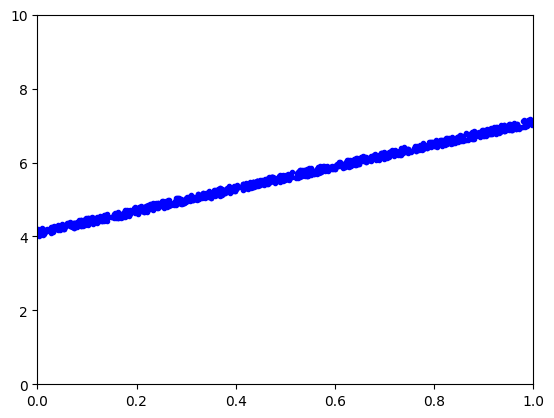

In [9]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(2)
X = np.random.rand(1000, 1)

y = 4+3*X +.2*np.random.rand(1000,1)# make y change a bit
ones = np.ones((X.shape[0],1))

X_bar = np.concatenate((ones,X),axis=1)


b=np.dot(X_bar.T,y)
A= np.dot(X_bar.T,X_bar)
w_lr = np.dot(np.linalg.pinv(A), b)

w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0
# print(x0,y0)
# Draw the fitting line 
plt.plot(X.T, y.T, 'b.')     # data 
print(y)
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()



In [7]:
def grad(w):
    N = X_bar.shape[0]
    return 1/N * X_bar.T.dot(X_bar.dot(w) - y)

def cost(w):
    N = X_bar.shape[0]
    return .5/N*np.linalg.norm(y - X_bar.dot(w), 2)**2


def numerical_grad(w, cost):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g 

def check_grad(w, cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 

print( 'Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))

Checking gradient... True


In [5]:
def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break 
        w.append(w_new)
    return (w, it) 

w_init = np.array([[2], [1]])
(w1, it1) = myGD(w_init, grad, 1)
print('Solution found by GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))

Solution found by GD: w =  [[4.11407996 2.96775119]] ,
after 49 iterations.
